### Ex 1: 
Re-transform linear regression on the latex output layer, from
$$
t=y(x, w)+\text { noise-> } w=\left(X^{T} X\right)-1 X^{T} t
$$

#### Answer: 
We have:
$+$, Set a observation $x=\left(x_{1}, x_{2}, \ldots, x_{N}\right)^{T}$

$+$, Total observation $\mathrm{N}$

$+$, Targel values $l=\left(l_{1}, l_{2}, \ldots l_{N}\right)^{T}$

Suppose that the observations are drawn independently from a Gaussiandistribution.

$$
t=y(x, w)+N\left(0, \beta^{-1}\right) t=N\left(y(x, w), \beta^{1}\right)
$$

with $\beta=\frac{1}{\sigma^{2}}$

$$
p(t \mid x, w, \beta)=N\left(t \mid y(x, w), \beta^{-1}\right)
$$
We now use the training data $x, 1$. 10 delermine the values of theunknown parameters w and by maximum likelihood. If the data areassumed to be drawn independently from the distribution then thelikelihood function:
$$
p(\ell \mid x, w, \beta)=\prod_{n=1}^{N} N\left(t \mid y(x, w), \beta^{-1}\right)
$$
It is convenient to maximize the logarithm of the likelihood function:
$$
\begin{gathered}
\operatorname{logp}(\iota \mid x, w, \beta)=\sum_{n=1}^{N} \log \left(N\left(l \mid y(x, w) \cdot \beta^{-1}\right)\right) \\
=\sum_{n=1}^{N} \log \left(\frac{1}{\sqrt{2 \pi \beta-1}} e^{\frac{\left.i t_{n}-y\left(x_{n}, w\right)\right)^{2} B}{2}}\right) \\
=\sum_{i=1}^{N}\left[\frac{1}{2} \log \left(2 \pi \beta^{-1}-\left(t_{n}-y\left(x_{n}, w\right)\right)^{2}-\frac{\beta}{2}\right]\right. \\
\cong-\sum_{i=1}^{N}\left(l_{n}-y\left(x_{n}, w\right)\right)^{2} \\
\longrightarrow \text { we minimize } \quad\left(t_{n}-y\left(x_{n}, w\right)\right)^{2}
\end{gathered}
$$

Set:
$$
L=\frac{1}{2 N} \sum_{i=1}^{N}\left(t_{n}-y\left(x_{n}, w\right)\right)^{2}
$$
with:
$$
x=\left[\begin{array}{cc}
1 & x_{1} \\
1 & x_{2} \\
1 & x_{3} \\
\ldots & \ldots \\
1 & x_{n}
\end{array}\right], \quad w=\left[\begin{array}{c}
w_{0} \\
w_{1}
\end{array}\right], \quad y=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
y_{3} \\
\ldots \\
y_{n}
\end{array}\right]=\left[\begin{array}{c}
w_{1} x_{1}+w_{0} \\
w_{1} x_{2}+w_{0} \\
w_{1} x_{3}+w_{0} \\
\ldots \\
w_{1} x_{n}+w_{0}
\end{array}\right]=x w
$$

we have:
$$
\begin{gathered}
\frac{\delta L}{\delta w}=\left[\begin{array}{c}
\frac{\delta L}{\delta w_{D}} \\
\frac{\delta L}{\delta w_{1}}
\end{array}\right]=\left[\begin{array}{c}
t-x w \\
x(t-x w)
\end{array}\right]=x^{T}(t-x w)=0 \\
\Leftrightarrow x^{T} t=x^{T} x w \\
\leftrightarrow w=\left(x^{T} x\right)^{-1} x^{T} t
\end{gathered}
$$

### Ex2 : 
Prove that $ X^{T} X $ is invertible when $\mathrm{X}$ is full rank.

#### Answer :
We have : Suppose $X^{T} v=0$

Then, of course, $X X^{T} v=0$ too.

Conversely, suppose $X X^{T} v=0$

Then $v^{T} X X^{T} v=0$, so that $\left(X^{T} v\right)^{T}\left(X^{T} v\right)=0$

This implies $X^{T} v=0$

Hence, we have proved that $X^{T} v=0$ if and only if $\mathrm{v}$ is in the nullspace of $X^{T} X .$ 

But $X^{T} v=0$ and $v \neq 0$ if and only if $\mathrm{X}$ has lincarly dependent rows.

Thus, $X^{T} X$ is invertible if and only if $\mathrm{X}$ has full row rank.

### Ex3 : linear Reg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import seaborn as sns
plt.style.use('ggplot')

In [2]:
!pip install seaborn

In [16]:
csv_url2 = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
csv_url = "https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(csv_url).content
download2 = requests.get(csv_url2).content

gianha = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [4]:
gianha.tail()

,Diện tích,Giá
25,90.3448,1374.92
26,92.7586,1410.16
27,95.1724,1469.69
28,97.5862,1478.54
29,100.0000,1515.28


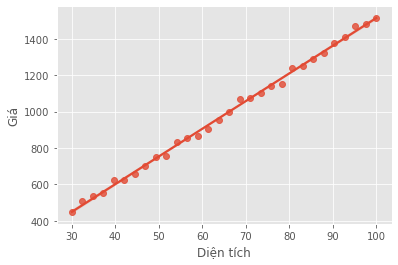

In [5]:
arr_gianha = gianha.values
N = arr_gianha.shape[0]

x = arr_gianha[:, 0].reshape(-1, 1)
y = arr_gianha[:, 1].reshape(-1, 1)

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

sns.regplot(x='Diện tích', y='Giá', data=gianha);

In [6]:
print(x.shape)
print(w.shape)

(30, 2)
(2, 1)


In [7]:
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.0000001

In [8]:
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w = w - learning_rate * np.dot(x.T, r)
print(w)

[[ 0.19471277]
 [15.10985856]]


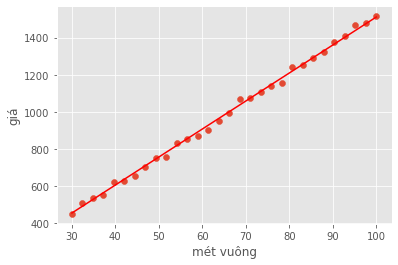

In [9]:
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
x = arr_gianha[:, 0].reshape(-1, 1)
y = arr_gianha[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

### Ex4 : linear reg

In [17]:
gianha2 = pd.read_csv(io.StringIO(download2.decode('utf-8')))

In [18]:
gianha2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [19]:
gianha2['ones'] = np.ones((gianha2.shape[0], 1))
gianha2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,ones
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.0


In [23]:
x = gianha2.drop('medv', axis = 1)
x = x.values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        1.0000e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        1.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        1.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        1.0000e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        1.0000e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.0000e+00]])

In [27]:
y=np.array([gianha2.medv]).reshape(-1,1)
y[1:10]

array([[21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [29]:
w = np.arange(0,gianha2.shape[1]-1,dtype=float).reshape(-1,1)
w

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.]])

In [30]:
iters = 100
cost = np.zeros((iters,1))
lr = 0.000001
for i in range(0, iters):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w = w - lr * np.dot(x.T, r)
w

/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


array([[6.01572049e+218],
       [1.33865246e+219],
       [1.62234439e+219],
       [9.18744638e+216],
       [7.63898899e+217],
       [8.38226102e+218],
       [9.57671389e+219],
       [4.80829362e+218],
       [1.48422989e+219],
       [5.92134416e+220],
       [2.50446290e+219],
       [4.78439489e+220],
       [1.78984767e+219],
       [1.34242322e+218]])